# WEEK 13 (22/01/18)

# Done
* Rewrote eps_scale in object-oriented style $\checkmark$
* Give population all 1 to pull out mass dependencies and plot to see $\checkmark$

### To Do
* Analyse the mass dependency of $\epsilon$ from the plots
* Look into pickling the ODM instead of storing it in file
* Start clustering cities together to see if flow is different at intra-city and inter-city level

### Questions
* <font color='green'> Could it be that: since clustering acts linearly on the mass but non-linearly on the distance, then $$k_{ab} \simeq \sum_{i \in a, j \in b}k_{ij}$$ given that we can also approximate $$f(r_{ab}) \simeq f(r_{ij})$$ </font> 

## 1. Uniform mass distribution

Since we now have too many variables that $\epsilon$ might depend on, let's try and simplify by using a uniform mass distribution ($m_i = 1  \forall i$). This way, we can pick out the mass dependencies by comparing the $\epsilon$ plots to what we did last week (see Notebook *Week 12*).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hm.analysis.scaling.plots import eps_distance
from matplotlib import pyplot as plt
import pandas

from hm.analysis.scaling.pop_hierarchy import pop_hier
from hm.analysis.scaling.plots import eps_distance

In [3]:
df = pandas.read_csv("/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/data/LSOA populations and areas 2011 (merged).csv")
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]
uni_lon = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]
uni_lon['TotPop2011'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
d_max = [1000, 3000, 5000]
N = 20 # number of bins

### 1.1 ODMs with uniform vs non-uniform population

In [5]:
import seaborn as sns; sns.set()

Let's try with level 3 so we don't have too many locations and can visualise better.

In [32]:
h = pop_hier(lon_df, d_max)
uh = pop_hier(uni_lon, d_max)

In [33]:
odm = h.gravity_ODM(3)
u_odm = uh.gravity_ODM(3)

A Jupyter Widget

A Jupyter Widget

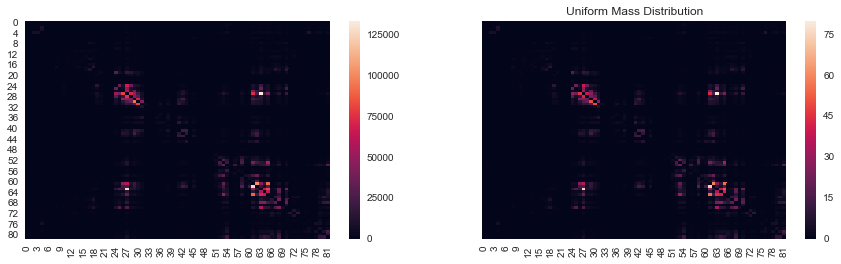

In [52]:
fig,axn = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_figwidth(15)
plt.title('Original Mass Distribution')
sns.heatmap(odm, ax=axn.flat[0])
plt.title('Uniform Mass Distribution')
sns.heatmap(u_odm, ax=axn.flat[1])

plt.show()

The flow only changes in magnitude between the two mass distributions $\rightarrow$ good, the flows distribution is not mass-dependent.

### 1.2 Rethinking epsilon in the cluster case

We can rewrite $\epsilon$ for an arbitrary number of locations clustered together (instead of only 2 grouped as seen before).
It looks like this:
$$ \epsilon_{ab} = 1 - \frac{\sum_{i \in a, j \in b}T_{ij}}{T_{ab}},$$

where $$T_{ab} = k_{ab} m_b f(r_{ab})$$
and $$k_{ab}^{-1} = \sum_{b} m_b f(ab),$$

So writing everything explicitly $\epsilon$ becomes:
$$ \epsilon_{ab} = 1 - \frac{\sum_{b} m_b f(ab)}{m_b f(r_{ab})} \sum_{i \in a, j \in b}\frac{m_j f(r_{ij})}{\sum_{l} m_l f(r_{il})}$$

#### 1.2.1 Level 1

In [47]:
eps_1 = h.epsilon(1)

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


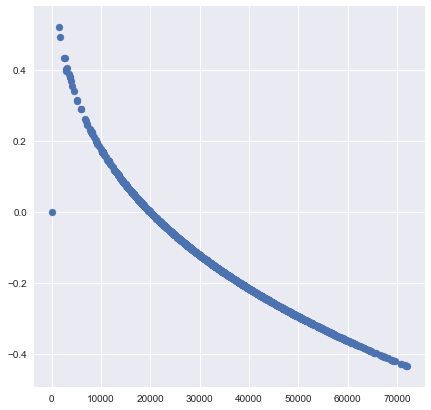

In [109]:
width = 7
height = 7
plt.figure(figsize=(width, height))
x = h.cluster_population(h.levels[0]).DM[50] #distance of location 20 with all the others
y = eps_1[50]
plt.scatter(x, y)
plt.show()

In [62]:
u_eps_1 = uh.epsilon(1)

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


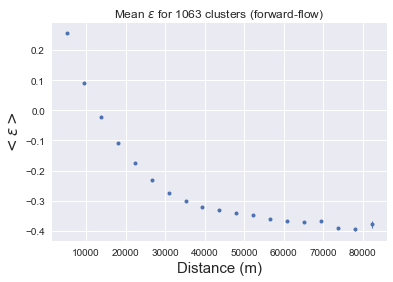

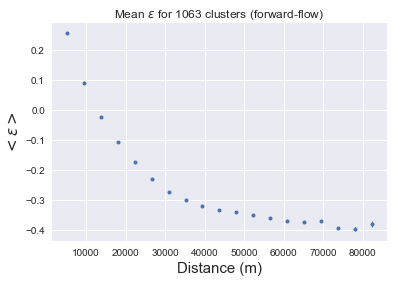

In [68]:
DM = h.cluster_population(h.levels[0]).DM
eps_distance(eps_1, DM, N)
eps_distance(u_eps_1, DM, N)

## 2 Uniform location distribution

Let's see what happens with a uniform location distribution instead

In [16]:
from numpy import random 
easting = [random.randint(493024, 561966) for i in range(6061)]
northing = [random.randint(150912, 207218) for i in range(6061)]
u_loc_lon = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]
u_loc_lon['Easting'] = easting
u_loc_lon['Northing'] = northing

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [22]:
ulh = pop_hier(u_loc_lon, d_max)

In [29]:
ulh_odm = ulh.gravity_ODM(3)

A Jupyter Widget

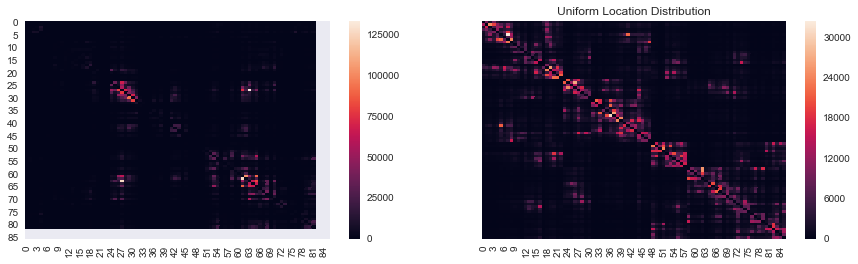

In [34]:
fig,axn = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_figwidth(15)
plt.title('Original Location Distribution')
sns.heatmap(odm, ax=axn.flat[0])
plt.title('Uniform Location Distribution')
sns.heatmap(ulh_odm, ax=axn.flat[1])

plt.show()

In [35]:
ulh_eps_1 = ulh.epsilon(1)

A Jupyter Widget

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


### 2.1 Level 1

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


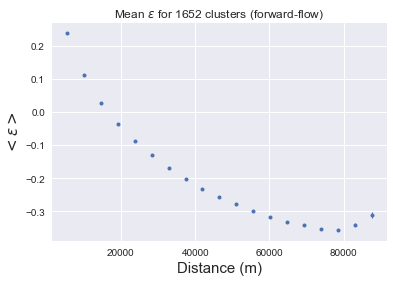

In [38]:
DM = h.cluster_population(ulh.levels[0]).DM
eps_distance(ulh_eps_1, DM, N)

In [39]:
ulh_eps_2 = ulh.epsilon(2)

A Jupyter Widget

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


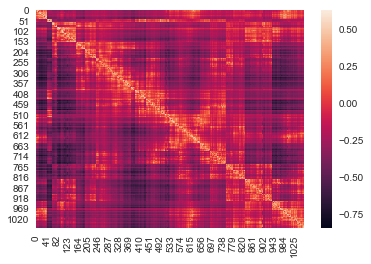

In [111]:
sns.heatmap(eps_1)
plt.show()

** PLOTS FROM LAST WEEK WERE PROBABLY WRONG, NEED TO HAVE A LOOK AGAIN**                                                                                                                                                                                                                                                

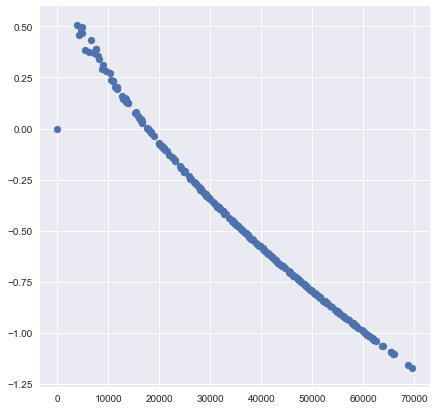

In [62]:
width = 7
height = 7
plt.figure(figsize=(width, height))
x = ulh.cluster_population(ulh.levels[1]).DM[20][1:] #distance of location 20 with all the others
y = ulh_eps_2[20][1:]
plt.scatter(x, y)
plt.show()

In [54]:
DM_2 = h.cluster_population(ulh.levels[1]).DM

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


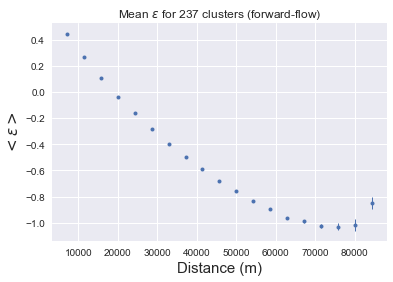

In [55]:
eps_distance(ulh_eps_2, DM_2, N)

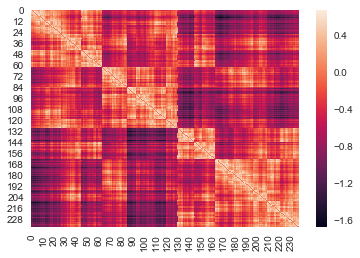

In [46]:
sns.heatmap(ulh_eps_2)
plt.show()